<a href="https://colab.research.google.com/github/mahima1911/Analysis-of-Lombard-Effect-on-Speech-Emotions/blob/main/FYP_Final_code_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

import glob  
import os  
import librosa  
import numpy as np  
from keras.models import Sequential  
from keras.layers import Dense, Activation  
from keras.layers import Dropout  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.decomposition import PCA


In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav')

Populating the interactive namespace from numpy and matplotlib


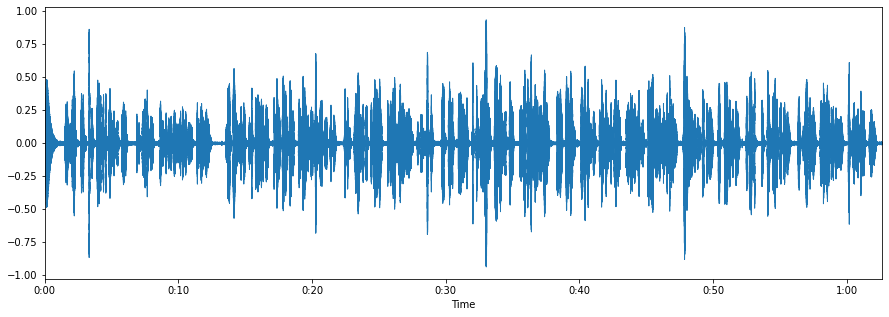

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
#visualising the audio sample

(array([[9.00588695e-05, 2.13139324e-04, 3.64909561e-04, ...,
         5.67216775e-08, 1.28504377e-10, 9.60992018e-08],
        [5.02509528e-05, 1.09821272e-04, 1.86187668e-04, ...,
         9.21503268e-08, 5.22843956e-08, 9.23569500e-08],
        [1.16375765e-07, 2.07574473e-07, 8.46316928e-08, ...,
         2.21335786e-08, 5.23573317e-09, 1.23338982e-08],
        ...,
        [9.10654607e-20, 6.95391098e-21, 5.07534656e-19, ...,
         1.85536236e-23, 1.00910915e-22, 5.51113236e-22],
        [1.89380216e-20, 2.25349811e-19, 2.13552075e-19, ...,
         2.66627084e-23, 5.26655321e-24, 1.29228708e-21],
        [1.99227374e-20, 4.86087439e-20, 3.51895255e-25, ...,
         5.16340382e-24, 1.11791621e-22, 7.60449131e-23]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

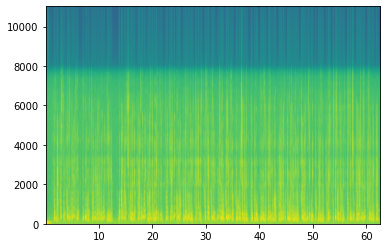

In [ ]:
plt.specgram(data,Fs=sampling_rate)

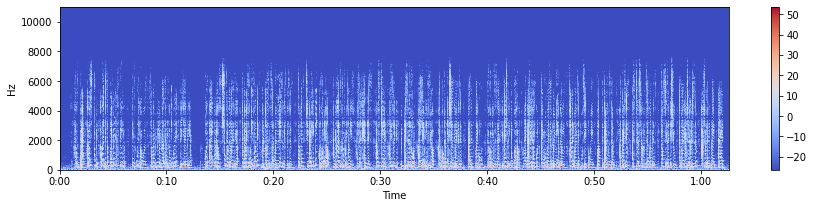

In [ ]:
#visualising the audio sample
x, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

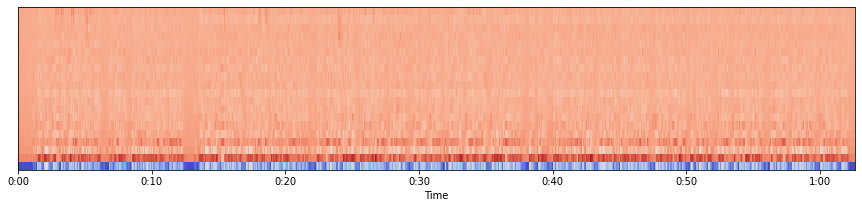

In [ ]:
x, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav')
mfccs = librosa.feature.mfcc(x, sr=sr)
# Displaying  the MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
!pip install pydub
from pydub import AudioSegment
# Load files
audio_segment = AudioSegment.from_file("/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav")
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Channels: 2
Sample width: 2
Frame rate (sample rate): 16000
Frame width: 4
Length (ms): 62633
Frame count: 1002123.0
Intensity: -20.50420899426861


In [ ]:
angry_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry')
happy_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy')
neutral_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral')
sad_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad')

angry_nm = sorted(angry_nm)
happy_nm = sorted(happy_nm)
neutral_nm = sorted(neutral_nm)
sad_nm = sorted(sad_nm)

In [ ]:
normal_speech = pd.DataFrame({'Angry' : [angry_nm],
                                'Happy' : [happy_nm],
                                'Neutral' : [neutral_nm],
                                'Sad' : [sad_nm], }, 
                                columns=['Angry','Happy', 'Neutral', 'Sad'])
normal_t = normal_speech.T
split_df = pd.DataFrame(normal_t[0].tolist())

In [ ]:
emotion = ['Angry', 'Happy', 'Neutral', 'Sad'];
split_df['Emotion'] = emotion
normal = split_df
normal

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Emotion
0,Anjali_a.wav,Christina_a.wav,Copy of Ajay_Angry.wav,Copy of KP_Angry.wav,Harshana_a.wav,Isha_a.wav,Janice_a.wav,Kathiyayini_a.wav,Lakshanya_a.wav,Mahima_a.wav,...,Rhea_a.wav,Rinee_a.wav,Rithika_a.wav,Sharan_a.wav,Sharvan_a.wav,Srinidhi_a.wav,Swana_a.wav,Vanathi_a.wav,Vrishin_a.wav,Angry
1,Anjali_h.wav,Christina_h.wav,Copy of Ajay_Happy.wav,Copy of KP_Happy.wav,Harshana_h.wav,Isha_h.wav,Janice_h.wav,Kathiyayini_h.wav,Lakshanya_h.wav,Mahima_h.wav,...,Rhea_h.wav,Rinee_h.wav,Rithika_h.wav,Sharan_h.wav,Sharvan_h.wav,Srinidhi_h.wav,Swana_h.wav,Vanathi_h.wav,Vrishin_h.wav,Happy
2,Anjali_n.wav,Christina_n.wav,Copy of Ajay_Neutral.wav,Copy of KP_Neutral.wav,Harshana_n.wav,Isha_n.wav,Janice_n.wav,Kathiyayini_n.wav,Lakshanya_n.wav,Mahima_n.wav,...,Rhea_n.wav,Rinee_n.wav,Rithika_n.wav,Sharan_n.wav,Sharvan_n.wav,Srinidhi_n.wav,Swana_n.wav,Vanathi_n.wav,Vrishin_n.wav,Neutral
3,Anjali_s.wav,Christina_s.wav,Copy of Ajay_Sad.wav,Copy of KP_Sad.wav,Harshana_s.wav,Isha_s.wav,Janice_s.wav,Kathiyayini_s.wav,Lakshanya_s.wav,Mahima_s.wav,...,Rhea_s.wav,Rinee_s.wav,Rithika_s.wav,Sharan_s.wav,Sharvan_s.wav,Srinidhi_s.wav,Swana_s.wav,Vanathi_s.wav,Vrishin_s.wav,Sad


**Feature Extraction** for Normal Speech

In [ ]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-2.8277964e-09 -5.6555929e-09  1.1311186e-08 -2.8277964e-09
 -5.6555929e-09 -1.5552880e-08  4.2416946e-09  5.6555929e-09
 -2.8277964e-09  0.0000000e+00  5.6555929e-09  0.0000000e+00
 -1.4138982e-09  5.6555929e-09  5.6555929e-09 -1.1311186e-08
  5.6555929e-09  5.6555929e-09  5.6555929e-09  0.0000000e+00]
[0.9999999 0.9999998 1.0000001 1.        1.        1.0000001 1.
 1.        1.        1.0000002 1.0000001 1.        0.9999999 1.
 1.        1.0000001 1.        0.9999999 1.        1.       ]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


In [ ]:
y, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav', sr=None) 
mfccs1 = librosa.feature.mfcc(y, sr, hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39)  #window size:20ms  #stide overlap shift:5ms

In [ ]:
mfcc_features = lambda x: np.hamming(mfccs1)

mfcc_features

<function __main__.<lambda>>

In [ ]:
#mfccs

In [ ]:
mylist_a= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/')
mylist_h= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy/')
mylist_s= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad/')
mylist_n= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral/')

In [ ]:
#angry
df_a = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_a):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_a = df_a.append(mfccs)
 

#Happy
df_h = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_h):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_h = df_h.append(mfccs)


#Sad
df_s = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_s):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_s = df_s.append(mfccs)


 #Neutral
df_n = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_n):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_n = df_n.append(mfccs) 



In [ ]:
dfa = df_a.fillna(0)
dfs = df_s.fillna(0)
dfh = df_h.fillna(0)
dfn = df_n.fillna(0)


dfa['Label'] = 'Angry'
dfs['Label'] = 'Sad'
dfh['Label'] = 'Happy'
dfn['Label'] = 'Neutral'

dfa





,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-403.276825,-403.244171,-403.152496,-403.062256,-403.055695,-403.036102,-402.985474,-402.941223,-402.806549,-402.439117,...,-165.703613,-161.750671,-158.274414,-155.258453,-152.937653,-151.273743,-150.187042,-149.571548,-149.308487,Angry
1,56.072845,56.312542,57.028725,58.156258,59.568382,61.018730,62.371536,63.560822,64.433044,64.807373,...,172.965576,173.481903,173.359741,172.682999,171.904510,171.113831,170.386810,169.815826,169.498260,Angry
2,36.677544,36.626793,36.470505,36.165123,35.667603,35.090508,34.484283,33.890240,33.416557,33.216805,...,-29.800903,-28.153585,-26.382988,-24.490484,-22.856686,-21.505512,-20.446016,-19.704473,-19.320137,Angry
3,25.124882,25.242249,25.584015,26.122990,26.802475,27.366838,27.747484,27.976109,27.988029,27.693201,...,23.044254,23.595682,23.967392,24.115725,24.382591,24.745758,25.143921,25.495834,25.706194,Angry
4,26.418760,26.394068,26.297318,26.099728,25.809294,25.607565,25.488297,25.420557,25.380800,25.370014,...,17.203901,17.517466,18.020962,18.759909,19.378319,19.870243,20.249210,20.515415,20.655266,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2.720315,2.699403,2.624282,2.483247,2.310137,2.205526,2.186169,2.143874,2.126999,2.147414,...,3.884550,4.052948,4.168109,4.253532,4.329252,4.399389,4.459177,4.502575,4.525211,Angry
35,4.449023,4.422779,4.368485,4.313490,4.234605,4.084337,3.905333,3.802662,3.672016,3.590073,...,1.052122,0.812002,0.490120,0.157113,-0.157358,-0.434188,-0.659006,-0.818523,-0.901180,Angry
36,7.411138,7.389760,7.300552,7.130128,6.933785,6.788879,6.637594,6.394728,6.266318,6.153616,...,-3.668825,-3.624379,-3.605186,-3.616946,-3.647544,-3.684982,-3.718555,-3.742054,-3.753599,Angry
37,7.964207,7.945853,7.920626,7.903066,7.834908,7.678343,7.534981,7.473476,7.246925,6.996791,...,0.878813,1.435990,1.928466,2.362418,2.731988,3.035603,3.272061,3.436246,3.520612,Angry


In [ ]:
normal_ft = pd.concat([dfa,dfs,dfh, dfn], ignore_index=True)
normal_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-403.276825,-403.244171,-403.152496,-403.062256,-403.055695,-403.036102,-402.985474,-402.941223,-402.806549,-402.439117,...,-165.703613,-161.750671,-158.274414,-155.258453,-152.937653,-151.273743,-150.187042,-149.571548,-149.308487,Angry
1,56.072845,56.312542,57.028725,58.156258,59.568382,61.018730,62.371536,63.560822,64.433044,64.807373,...,172.965576,173.481903,173.359741,172.682999,171.904510,171.113831,170.386810,169.815826,169.498260,Angry
2,36.677544,36.626793,36.470505,36.165123,35.667603,35.090508,34.484283,33.890240,33.416557,33.216805,...,-29.800903,-28.153585,-26.382988,-24.490484,-22.856686,-21.505512,-20.446016,-19.704473,-19.320137,Angry
3,25.124882,25.242249,25.584015,26.122990,26.802475,27.366838,27.747484,27.976109,27.988029,27.693201,...,23.044254,23.595682,23.967392,24.115725,24.382591,24.745758,25.143921,25.495834,25.706194,Angry
4,26.418760,26.394068,26.297318,26.099728,25.809294,25.607565,25.488297,25.420557,25.380800,25.370014,...,17.203901,17.517466,18.020962,18.759909,19.378319,19.870243,20.249210,20.515415,20.655266,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,5.403732,5.328944,5.126645,4.813124,4.431493,3.904294,3.435157,3.017069,2.596895,2.256824,...,1.566809,2.062281,2.552065,3.023715,3.462490,3.851273,4.169448,4.395929,4.514797,Neutral
3272,2.828058,2.809383,2.763652,2.679560,2.551623,2.474070,2.285464,2.069238,1.935485,1.797226,...,5.395122,5.734778,6.009991,6.223838,6.383025,6.496499,6.572443,6.618284,6.639328,Neutral
3273,5.257238,5.278002,5.335953,5.429718,5.551160,5.597608,5.724213,5.832082,5.836075,5.910857,...,1.223549,0.905148,0.548679,0.169391,-0.211059,-0.565915,-0.867259,-1.086974,-1.202778,Neutral
3274,7.387788,7.385876,7.371701,7.351870,7.347256,7.448485,7.491197,7.565545,7.710608,7.647410,...,1.413145,1.055447,0.704543,0.369063,0.059052,-0.213399,-0.436399,-0.595592,-0.676547,Neutral


**Feature Extraction** for Lombard Speech

In [ ]:
mylist_la= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Angry/')
mylist_lh= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Happy/')
mylist_ls= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Sad/')
mylist_ln= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Neutral/')

In [ ]:
#Neutral Lombard
df_ln = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_ln):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Neutral/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39 ) 
  mfccs = pd.DataFrame(mfccs)
  df_ln = df_ln.append(mfccs)

#Angry Lombard
df_la = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_la):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Angry/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39) 
  mfccs = pd.DataFrame(mfccs)
  df_la = df_la.append(mfccs)

#Sad Lombard
df_ls = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_ls):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Sad/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39) 
  mfccs = pd.DataFrame(mfccs)
  df_ls = df_ls.append(mfccs)


#Happy Lombard
df_lh = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_lh):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Happy/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39) 
  mfccs = pd.DataFrame(mfccs)
  df_lh = df_lh.append(mfccs) 



In [ ]:
dfls= df_ls.fillna(0)
dflh = df_lh.fillna(0)
dfln = df_ln.fillna(0)
dfla = df_la.fillna(0)

dfls['Label'] = 'Sad'
dflh['Label'] = 'Happy'
dfln['Label'] = 'Neutral'
dfla['Label'] = 'Angry'

dfla

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,...,-170.496414,-168.846573,-167.113281,-165.246429,-163.302017,-161.508560,-160.099838,-159.174500,-158.725769,Angry
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,107.871681,107.581642,107.316452,107.200668,107.265869,107.440750,107.628296,107.769012,107.843048,Angry
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-66.478607,-61.024464,-56.702103,-53.457314,-51.136559,-49.506416,-48.352066,-47.583496,-47.195049,Angry
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.960663,85.698090,84.582458,83.601471,82.701889,81.911667,81.287537,80.860245,80.644142,Angry
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-43.801479,-42.945290,-42.048695,-41.178253,-40.360977,-39.646034,-39.099030,-38.742638,-38.569073,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,4.628209,4.641333,4.656544,4.701885,4.754332,4.823093,4.895763,4.966583,4.954335,4.890648,...,4.484628,4.583389,4.602588,4.407739,3.903617,3.370511,2.956094,2.641390,2.460229,Angry
35,2.079098,2.125483,2.270925,2.463320,2.673146,2.944265,3.213033,3.442754,3.660861,3.847768,...,2.338981,2.265299,2.025540,1.426398,0.550583,-0.238311,-0.807406,-1.171322,-1.356920,Angry
36,4.704386,4.752940,4.876847,5.053068,5.298342,5.564968,5.820305,6.069494,6.322774,6.537879,...,0.043300,0.491707,0.708180,0.477182,-0.199317,-0.934870,-1.344674,-1.440573,-1.441219,Angry
37,3.733682,3.840256,4.158599,4.659307,5.238169,5.835445,6.460788,7.045835,7.552105,7.969726,...,0.351669,0.796891,1.434037,2.205048,2.798308,3.094097,3.246192,3.357356,3.403836,Angry


In [ ]:
lombard_ft = pd.concat([dfla,dfls,dflh, dfln], ignore_index=True)
lombard_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,-544.799438,...,-170.496414,-168.846573,-167.113281,-165.246429,-163.302017,-161.508560,-160.099838,-159.174500,-158.725769,Angry
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,107.871681,107.581642,107.316452,107.200668,107.265869,107.440750,107.628296,107.769012,107.843048,Angry
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-66.478607,-61.024464,-56.702103,-53.457314,-51.136559,-49.506416,-48.352066,-47.583496,-47.195049,Angry
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.960663,85.698090,84.582458,83.601471,82.701889,81.911667,81.287537,80.860245,80.644142,Angry
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-43.801479,-42.945290,-42.048695,-41.178253,-40.360977,-39.646034,-39.099030,-38.742638,-38.569073,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,0.731747,0.738876,0.752480,0.827604,0.937325,1.043558,1.184357,1.291048,1.418052,1.544191,...,-7.760871,-8.079742,-8.415268,-8.790731,-9.231142,-9.714630,-10.118551,-10.232651,-9.868431,Neutral
3272,0.573107,0.635598,0.837265,1.167281,1.612113,2.157784,2.700773,3.265419,3.761973,4.223872,...,6.273293,6.303661,6.199419,5.909954,5.379520,4.557779,3.489063,2.389905,1.577006,Neutral
3273,1.927642,1.971713,2.131874,2.345869,2.567058,2.770674,3.050421,3.359213,3.620220,3.886113,...,-0.312862,0.149650,0.633704,1.166188,1.805991,2.553516,3.362185,4.100946,4.325429,Neutral
3274,3.779898,3.761172,3.727754,3.659078,3.587961,3.523660,3.337872,3.098413,2.838486,2.604037,...,-1.175710,-1.525296,-1.947804,-2.419866,-2.793851,-2.894684,-2.551837,-1.704808,-0.803749,Neutral


In [ ]:
from sklearn.utils import shuffle
rnormal_ft = shuffle(normal_ft)
rlombard_ft = shuffle(lombard_ft)


rnormal_ft = rnormal_ft.fillna(0)
rlombard_ft = rlombard_ft.fillna(0)
rnormal_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
710,-2.074564,-2.009848,-1.819114,-1.511316,-1.095404,-0.579662,0.031192,0.804523,1.720663,2.725801,...,7.182762,7.609932,8.038925,8.480226,8.907419,9.294648,9.694779,9.987967,10.143062,Angry
802,9.375776,9.376777,9.361980,9.295702,9.141787,8.887204,8.584128,8.369619,8.323223,8.282967,...,8.425886,8.902426,9.272956,9.533463,9.705772,9.812593,9.875296,9.909613,9.924820,Angry
2085,8.769002,8.752833,8.707731,8.637613,8.539124,8.402757,8.215786,7.969846,7.661827,7.294468,...,7.409934,7.553169,7.525208,7.475264,7.384544,7.302151,7.196467,7.112312,7.058292,Happy
1242,2.907448,2.935870,3.014509,3.129213,3.265482,3.415307,3.576126,3.752536,3.950020,4.177783,...,27.289211,26.655659,25.954580,25.258799,24.611301,24.044998,23.578449,23.241495,23.064293,Sad
2460,44.786621,44.726391,44.555058,44.296818,43.980904,43.634628,43.280563,42.935158,42.610111,42.313507,...,45.595444,45.708633,45.771618,45.803940,45.821205,45.836609,45.857227,45.881500,45.898884,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,1.487054,1.515607,1.611808,1.767393,2.039476,2.275132,2.365279,2.318510,2.454819,2.800972,...,-0.706449,-1.031373,-1.320049,-1.560777,-1.748095,-1.882541,-1.969854,-2.018709,-2.038545,Neutral
2092,1.390909,1.459655,1.654950,1.948611,2.303853,2.682397,3.049274,3.377398,3.648187,3.849323,...,-7.167684,-7.469521,-7.737595,-7.952028,-8.181764,-8.399530,-8.632649,-8.832771,-8.959054,Happy
1031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.381563,3.355128,3.328114,3.304219,3.283387,3.265168,3.249819,3.238340,3.232195,Sad
1868,6.792028,6.799958,6.836090,6.894304,6.925643,6.916918,6.926238,6.939318,6.822155,6.662433,...,3.708087,3.546526,3.366191,3.144048,2.918943,2.666710,2.445444,2.279099,2.189297,Happy


In [ ]:
rlombard_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
2986,13.216772,13.252239,13.331743,13.391128,13.360318,13.264982,13.116585,12.931362,12.557193,12.133129,...,-3.613218,-2.724694,-1.980920,-1.046131,-0.026884,1.070067,2.167196,3.113328,3.760300,Neutral
2223,-383.416046,-383.488434,-383.722931,-384.160339,-384.847565,-385.822266,-387.111725,-388.736053,-390.706024,-392.876129,...,-180.146088,-176.918701,-174.251068,-172.147919,-170.590378,-169.536346,-168.916977,-168.628784,-168.540634,Happy
3068,6.364692,6.352544,6.321415,6.282802,6.245403,6.211715,6.181561,6.152953,6.124373,6.093024,...,-10.429678,-11.374124,-12.213242,-12.928749,-13.510427,-13.966600,-14.305702,-14.534342,-14.650120,Neutral
2652,-396.854401,-396.884766,-397.005463,-397.285706,-397.802368,-398.617157,-399.769836,-401.258392,-403.052856,-404.969299,...,-204.497894,-202.706390,-201.037521,-199.635086,-198.530289,-197.727066,-197.192780,-196.880081,-196.736359,Neutral
1091,1.346896,1.342832,1.322149,1.319512,1.351261,1.432998,1.592810,1.688989,1.893472,1.885840,...,-6.503809,-6.971222,-7.331677,-7.517148,-7.522875,-7.434680,-7.253626,-7.042397,-6.878188,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2.861478,2.802313,2.646104,2.441808,2.239202,2.073215,1.963864,1.928010,1.980396,1.956461,...,-2.453139,-2.790002,-3.151249,-3.444720,-3.688370,-3.890901,-4.055077,-4.175181,-4.238873,Neutral
623,0.646214,0.664131,0.708839,0.754763,0.781669,0.783282,0.764645,0.749777,0.745551,0.738964,...,-2.441503,-2.641583,-2.904166,-3.213292,-3.540951,-3.849442,-4.103805,-4.277692,-4.360086,Angry
2112,19.325800,19.268291,19.100906,18.832575,18.564907,18.333996,18.206936,18.108139,17.957230,17.749889,...,-15.797064,-15.262869,-14.704248,-14.129580,-13.546183,-12.979586,-12.463465,-12.054998,-11.824461,Happy
2061,-1.449955,-1.469601,-1.495823,-1.499834,-1.457871,-1.364704,-1.233881,-1.092075,-0.954701,-0.827598,...,3.351888,2.189476,1.026733,-0.102914,-1.195767,-2.216749,-3.110534,-3.795291,-4.172598,Happy


**Splitting dataset into test ad train**

In [ ]:
newdf1 = np.random.rand(len(rnormal_ft)) < 0.7
train = rnormal_ft[newdf1]
test = rnormal_ft[~newdf1]


In [ ]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]



In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train.shape

(2324, 4)

In [ ]:
X_train.shape

(2324, 16538)

**Building classifier with CNN** - Conv1D

In [ ]:


x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)



In [ ]:
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(16538,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16538, 256)        1536      
                                                                 
 activation (Activation)     (None, 16538, 256)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 16538, 128)        163968    
                                                                 
 activation_1 (Activation)   (None, 16538, 128)        0         
                                                                 
 dropout (Dropout)           (None, 16538, 128)        0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2067, 128)        0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


**Removed the whole training part for avoiding unnecessary long epochs list**

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=10, epochs=10, validation_data=(x_testcnn, y_test))

Epoch 1/10
233/233 [==============================] - 27s 96ms/step - loss: 2.2379 - accuracy: 0.2956 - val_loss: 1.2062 - val_accuracy: 0.4905
Epoch 2/10
233/233 [==============================] - 22s 94ms/step - loss: 0.7800 - accuracy: 0.6889 - val_loss: 0.3589 - val_accuracy: 0.8624
Epoch 3/10
233/233 [==============================] - 22s 96ms/step - loss: 0.3653 - accuracy: 0.9032 - val_loss: 0.1895 - val_accuracy: 0.9181
Epoch 4/10
233/233 [==============================] - 22s 96ms/step - loss: 0.2251 - accuracy: 0.9484 - val_loss: 0.1873 - val_accuracy: 0.9517
Epoch 5/10
233/233 [==============================] - 23s 98ms/step - loss: 0.1333 - accuracy: 0.9596 - val_loss: 0.1413 - val_accuracy: 0.9580
Epoch 6/10
233/233 [==============================] - 23s 98ms/step - loss: 0.0736 - accuracy: 0.9725 - val_loss: 0.0803 - val_accuracy: 0.9685
Epoch 7/10
233/233 [==============================] - 23s 99ms/step - loss: 0.0587 - accuracy: 0.9742 - val_loss: 0.0952 - val_accuracy:

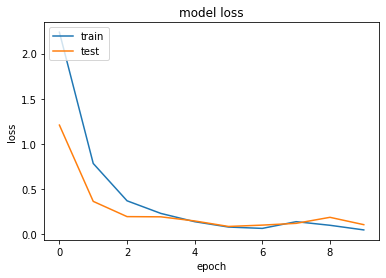

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Saving the model**

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

**Loading the model**

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 96.85%


In [ ]:
#add lombard dataset
test_lm = rlombard_ft

testfeatures_lm = test_lm.iloc[:, :-1]
testlabel_lm = test_lm.iloc[:, -1:]

X_test_lm = np.array(testfeatures_lm)
y_test_lm = np.array(testlabel_lm)

y_test_lm = np_utils.to_categorical(lb.fit_transform(y_test_lm))

x_testcnn_lm= np.expand_dims(X_test_lm, axis=2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score1 = loaded_model.evaluate(x_testcnn_lm, y_test_lm, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score1[1]*100))

accuracy: 27.81%


In [ ]:
print("%s of Normal Speech: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("%s of Lombard speech: %.2f%%" % (loaded_model.metrics_names[1], score1[1]*100))


accuracy of Normal Speech: 96.85%
accuracy of Lombard speech: 27.81%


In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
newdf1 = np.random.rand(len(rlombard_ft)) < 0.7
train_3 = rlombard_ft[newdf1]
test_3 = rlombard_ft[~newdf1]

trainfeatures_3 = train_3.iloc[:, :-1]
trainlabel_3 = train_3.iloc[:, -1:]
testfeatures_3 = test_3.iloc[:, :-1]
testlabel_3 = test_3.iloc[:, -1:]


X_train_3= np.array(trainfeatures_3)
y_train_3 = np.array(trainlabel_3)
X_test_3 = np.array(testfeatures_3)
y_test_3 = np.array(testlabel_3)

lb = LabelEncoder()

y_train_3 = np_utils.to_categorical(lb.fit_transform(y_train_3))
y_test_3 = np_utils.to_categorical(lb.fit_transform(y_test_3))

x_traincnn_3 =np.expand_dims(X_train_3, axis=2)
x_testcnn_3= np.expand_dims(X_test_3, axis=2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#3rd column
cnnhistory=model.fit(x_traincnn_3, y_train_3, batch_size=10, epochs=2, validation_data=(x_testcnn_3, y_test_3))

Epoch 1/2
235/235 [==============================] - 91s 100ms/step - loss: 2.0032 - accuracy: 0.2860 - val_loss: 1.3050 - val_accuracy: 0.3402
Epoch 2/2
235/235 [==============================] - 23s 97ms/step - loss: 0.7243 - accuracy: 0.7055 - val_loss: 0.3641 - val_accuracy: 0.8542


**CLASSIFIERS**

**Random Forest Classifier**

In [ ]:
#Train test split
x = rnormal_ft.drop(["Label"],axis=1)
y = rnormal_ft["Label"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.3)

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators=300)
rfclassifier.fit(xtrain,ytrain)
rfy_pred = rfclassifier.predict(xtest)

In [ ]:
print(confusion_matrix(ytest, rfy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, rfy_pred))
print(accuracy_score(ytest,rfy_pred))

[[167  29  28  26]
 [ 17 173  35  22]
 [ 17  27 167  28]
 [ 23  41  27 156]]
              precision    recall  f1-score   support

       Angry       0.65      0.70      0.67       239
       Happy       0.75      0.67      0.70       250
     Neutral       0.67      0.63      0.65       247
         Sad       0.64      0.70      0.67       247

    accuracy                           0.67       983
   macro avg       0.68      0.67      0.67       983
weighted avg       0.68      0.67      0.67       983

0.6744659206510681


In [ ]:
train = rnormal_ft
test = rlombard_ft

trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [ ]:
#lombard
rfclassifier = RandomForestClassifier(n_estimators=300)
rfclassifier.fit(trainfeatures,trainlabel)
rfy_pred = rfclassifier.predict(testfeatures)

print(confusion_matrix(testlabel, rfy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, rfy_pred))
print(accuracy_score(testlabel,rfy_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[294 103 249 173]
 [228 212 142 237]
 [258 112 243 206]
 [204 117 168 330]]
              precision    recall  f1-score   support

       Angry       0.30      0.30      0.30       819
       Happy       0.30      0.36      0.33       819
     Neutral       0.35      0.40      0.37       819
         Sad       0.39      0.26      0.31       819

    accuracy                           0.33      3276
   macro avg       0.34      0.33      0.33      3276
weighted avg       0.34      0.33      0.33      3276

0.32936507936507936


In [ ]:
#3rd column
x = rlombard_ft.drop(["Label"],axis=1)
y = rlombard_ft["Label"]
xtrain_lm,xtest_lm,ytrain_lm,ytest_lm = train_test_split(x,y,shuffle=True,test_size=0.3)

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators=300)
rfclassifier.fit(xtrain_lm,ytrain_lm)
rfy_pred = rfclassifier.predict(xtest_lm)

In [ ]:
print(confusion_matrix(ytest_lm, rfy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, rfy_pred))
print(accuracy_score(ytest_lm,rfy_pred))

[[145  24  47  37]
 [ 22 179  22  19]
 [ 34  22 152  23]
 [ 26  41  23 167]]
              precision    recall  f1-score   support

       Angry       0.62      0.66      0.64       231
       Happy       0.64      0.57      0.60       253
     Neutral       0.68      0.65      0.66       257
         Sad       0.67      0.74      0.70       242

    accuracy                           0.65       983
   macro avg       0.65      0.66      0.65       983
weighted avg       0.65      0.65      0.65       983

0.6541200406917599




**SVM**

In [ ]:
from sklearn.svm import SVC  
svc_classifier = SVC(kernel='linear') 
svc_classifier.fit(xtrain,ytrain)


SVC(kernel='linear')

In [ ]:
svc_pred = svc_classifier.predict(xtest)

print(confusion_matrix(ytest, svc_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, svc_pred))
print(accuracy_score(ytest,svc_pred))

[[66 65 65 54]
 [54 56 80 57]
 [67 48 73 51]
 [45 57 76 69]]
              precision    recall  f1-score   support

       Angry       0.25      0.31      0.27       239
       Happy       0.28      0.26      0.27       250
     Neutral       0.30      0.28      0.29       247
         Sad       0.25      0.23      0.24       247

    accuracy                           0.27       983
   macro avg       0.27      0.27      0.27       983
weighted avg       0.27      0.27      0.27       983

0.2685656154628688


In [ ]:
#lombard
svc_classifier = SVC(kernel='linear') 
svc_classifier.fit(trainfeatures,trainlabel)
svc_pred = svc_classifier.predict(testfeatures)

print(confusion_matrix(testlabel, svc_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, svc_pred))
print(accuracy_score(testlabel,svc_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[221 123 306 169]
 [255 138 255 171]
 [216 128 306 169]
 [196 139 281 203]]
              precision    recall  f1-score   support

       Angry       0.27      0.37      0.31       819
       Happy       0.25      0.27      0.26       819
     Neutral       0.29      0.25      0.27       819
         Sad       0.26      0.17      0.20       819

    accuracy                           0.26      3276
   macro avg       0.27      0.26      0.26      3276
weighted avg       0.27      0.26      0.26      3276

0.26495726495726496


In [ ]:
#3rd col
svc_classifier = SVC(kernel='linear') 
svc_classifier.fit(xtrain_lm,ytrain_lm)
svc_pred = svc_classifier.predict(xtest_lm)

print(confusion_matrix(ytest_lm, svc_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, svc_pred))
print(accuracy_score(ytest_lm,svc_pred))

[[63 45 87 58]
 [61 56 62 63]
 [70 51 54 56]
 [63 39 83 72]]
              precision    recall  f1-score   support

       Angry       0.19      0.23      0.21       231
       Happy       0.25      0.25      0.25       253
     Neutral       0.29      0.28      0.28       257
         Sad       0.29      0.23      0.26       242

    accuracy                           0.25       983
   macro avg       0.25      0.25      0.25       983
weighted avg       0.26      0.25      0.25       983

0.24923702950152593


**MLP**

In [ ]:

from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
mlp_model.fit(xtrain,ytrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
y_pred=mlp_model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
#y_pred = (y_pred > 0.5) 
accuracy=accuracy_score(y_true=ytest, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 27.37%


In [ ]:
#lombard

from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

mlp_model.fit(trainfeatures,trainlabel)
y_pred=mlp_model.predict(testfeatures)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true=testlabel, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 26.71%


In [ ]:
#3rd col

from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

mlp_model.fit(xtrain_lm,ytrain_lm)
y_pred=mlp_model.predict(xtest_lm)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true=ytest_lm, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 28.28%


**KNN Classifier**

In [ ]:
x = rnormal_ft.drop(["Label"],axis=1)
y = rnormal_ft["Label"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.3)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred  = classifier.predict(xtest)

print(confusion_matrix(ytest, y_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, y_pred))
print(accuracy_score(ytest,y_pred))

[[ 74  58   9 125]
 [  1 160   6  85]
 [  3  45  91  85]
 [  1  19   2 219]]
              precision    recall  f1-score   support

       Angry       0.84      0.41      0.55       224
       Happy       0.94      0.28      0.43       266
     Neutral       0.43      0.91      0.58       241
         Sad       0.57      0.63      0.60       252

    accuracy                           0.55       983
   macro avg       0.69      0.56      0.54       983
weighted avg       0.70      0.55      0.54       983

0.5534079348931842


In [ ]:
#lombard
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(trainfeatures,trainlabel)

y_pred  = classifier.predict(testfeatures)
result = confusion_matrix(testlabel, y_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral'])
print("Confusion Matrix:")
print(result)
result1 = classification_report(testlabel, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(testlabel,y_pred)
print("Accuracy:",result2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:
[[ 15 288  29 487]
 [  4 299  19 497]
 [ 14 297  24 484]
 [ 11 253  18 537]]
Classification Report:
              precision    recall  f1-score   support

       Angry       0.27      0.03      0.05       819
       Happy       0.34      0.02      0.03       819
     Neutral       0.27      0.66      0.38       819
         Sad       0.26      0.37      0.31       819

    accuracy                           0.27      3276
   macro avg       0.28      0.27      0.19      3276
weighted avg       0.28      0.27      0.19      3276

Accuracy: 0.2670940170940171


In [ ]:
#3rd col
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(xtrain_lm,ytrain_lm)

y_pred  = classifier.predict(xtest_lm)
result = confusion_matrix(ytest_lm, y_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral'])
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest_lm, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest_lm,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 68  65  16 104]
 [  3 154   9  76]
 [  6  53  83  89]
 [  3  44   8 202]]
Classification Report:
              precision    recall  f1-score   support

       Angry       0.72      0.36      0.48       231
       Happy       0.85      0.27      0.41       253
     Neutral       0.43      0.79      0.55       257
         Sad       0.49      0.64      0.55       242

    accuracy                           0.52       983
   macro avg       0.62      0.51      0.50       983
weighted avg       0.62      0.52      0.50       983

Accuracy: 0.5157680569684638


**XGB Classifier**

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(xtrain,ytrain)
xgby_pred = xgb_model.predict(xtest)
print(confusion_matrix(ytest, xgby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, xgby_pred))
print(accuracy_score(ytest,xgby_pred))

[[173  24  26  43]
 [ 11 178  31  32]
 [ 19  26 145  34]
 [ 16  33  29 163]]
              precision    recall  f1-score   support

       Angry       0.63      0.65      0.64       224
       Happy       0.79      0.65      0.71       266
     Neutral       0.60      0.68      0.64       241
         Sad       0.68      0.71      0.69       252

    accuracy                           0.67       983
   macro avg       0.67      0.67      0.67       983
weighted avg       0.68      0.67      0.67       983

0.6703967446592065


In [ ]:
#lombard
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(trainfeatures,trainlabel)
xgby_pred = xgb_model.predict(testfeatures)
print(confusion_matrix(testlabel, xgby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, xgby_pred))
print(accuracy_score(testlabel,xgby_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[251 156 207 205]
 [234 219 124 242]
 [250 152 199 218]
 [224 124 162 309]]
              precision    recall  f1-score   support

       Angry       0.29      0.24      0.26       819
       Happy       0.26      0.31      0.28       819
     Neutral       0.32      0.38      0.34       819
         Sad       0.34      0.27      0.30       819

    accuracy                           0.30      3276
   macro avg       0.30      0.30      0.30      3276
weighted avg       0.30      0.30      0.30      3276

0.29853479853479853


In [ ]:
#3rd col
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(xtrain_lm,ytrain_lm)
xgby_pred = xgb_model.predict(xtest_lm)
print(confusion_matrix(ytest_lm, xgby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, xgby_pred))
print(accuracy_score(ytest_lm,xgby_pred))

[[142  35  44  32]
 [ 31 165  18  28]
 [ 48  23 133  27]
 [ 33  29  37 158]]
              precision    recall  f1-score   support

       Angry       0.57      0.58      0.57       231
       Happy       0.56      0.56      0.56       253
     Neutral       0.64      0.61      0.63       257
         Sad       0.65      0.68      0.67       242

    accuracy                           0.61       983
   macro avg       0.61      0.61      0.61       983
weighted avg       0.61      0.61      0.61       983

0.6083418107833164


**GradientBoostingClassifier**

In [ ]:
gbclassifier = GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(xtrain,ytrain)
gby_pred = gbclassifier.predict(xtest)
print(confusion_matrix(ytest, gby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, gby_pred))
print(accuracy_score(ytest,gby_pred))

[[185  16  29  36]
 [ 14 181  21  36]
 [ 16  29 145  34]
 [ 18  27  30 166]]
              precision    recall  f1-score   support

       Angry       0.64      0.65      0.65       224
       Happy       0.79      0.70      0.74       266
     Neutral       0.61      0.69      0.65       241
         Sad       0.72      0.72      0.72       252

    accuracy                           0.69       983
   macro avg       0.69      0.69      0.69       983
weighted avg       0.69      0.69      0.69       983

0.688708036622584


In [ ]:
#lombard
gbclassifier = GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(trainfeatures,trainlabel)
gby_pred = gbclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, gby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, gby_pred))
print(accuracy_score(testlabel,gby_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[226 130 239 224]
 [221 204 149 245]
 [225 153 232 209]
 [183 104 192 340]]
              precision    recall  f1-score   support

       Angry       0.29      0.28      0.28       819
       Happy       0.26      0.28      0.27       819
     Neutral       0.33      0.42      0.37       819
         Sad       0.35      0.25      0.29       819

    accuracy                           0.31      3276
   macro avg       0.31      0.31      0.30      3276
weighted avg       0.31      0.31      0.30      3276

0.3058608058608059


In [ ]:
#3rd col
gbclassifier = GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(xtrain_lm,ytrain_lm)
gby_pred = gbclassifier.predict(xtest_lm)
print(confusion_matrix(ytest_lm, gby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, gby_pred))
print(accuracy_score(ytest_lm,gby_pred))

[[138  32  43  40]
 [ 26 163  24  29]
 [ 39  18 141  33]
 [ 34  23  37 163]]
              precision    recall  f1-score   support

       Angry       0.58      0.61      0.59       231
       Happy       0.58      0.55      0.56       253
     Neutral       0.62      0.63      0.62       257
         Sad       0.69      0.67      0.68       242

    accuracy                           0.62       983
   macro avg       0.62      0.62      0.62       983
weighted avg       0.62      0.62      0.62       983

0.6154628687690743


**DecisionTreeClassifier**

In [ ]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(xtrain,ytrain)
dty_pred = dtclassifier.predict(xtest)
print(confusion_matrix(ytest, dty_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, dty_pred))
print(accuracy_score(ytest,dty_pred))

[[ 91  47  71  57]
 [ 38 104  53  57]
 [ 42  44  87  51]
 [ 45  46  67  83]]
              precision    recall  f1-score   support

       Angry       0.31      0.39      0.35       224
       Happy       0.42      0.34      0.38       266
     Neutral       0.33      0.34      0.34       241
         Sad       0.43      0.41      0.42       252

    accuracy                           0.37       983
   macro avg       0.38      0.37      0.37       983
weighted avg       0.38      0.37      0.37       983

0.3713123092573754


In [ ]:
#lombard
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(trainfeatures,trainlabel)
dty_pred = dtclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, dty_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, dty_pred))
print(accuracy_score(testlabel,dty_pred))

[[248 160 229 182]
 [196 187 173 263]
 [197 193 201 228]
 [191 184 175 269]]
              precision    recall  f1-score   support

       Angry       0.26      0.25      0.25       819
       Happy       0.30      0.30      0.30       819
     Neutral       0.29      0.33      0.31       819
         Sad       0.26      0.23      0.24       819

    accuracy                           0.28      3276
   macro avg       0.28      0.28      0.28      3276
weighted avg       0.28      0.28      0.28      3276

0.27625152625152627


In [ ]:
#lombard
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(xtrain_lm,ytrain_lm)
dty_pred = dtclassifier.predict(xtest_lm)
print(confusion_matrix(ytest_lm, dty_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, dty_pred))
print(accuracy_score(ytest_lm,dty_pred))

[[86 46 56 65]
 [45 85 51 61]
 [44 45 75 67]
 [53 56 49 99]]
              precision    recall  f1-score   support

       Angry       0.32      0.32      0.32       231
       Happy       0.38      0.34      0.36       253
     Neutral       0.34      0.39      0.36       257
         Sad       0.37      0.35      0.36       242

    accuracy                           0.35       983
   macro avg       0.35      0.35      0.35       983
weighted avg       0.35      0.35      0.35       983

0.35096642929806715


**BaggingClassifier**

In [ ]:
bcclassifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bcclassifier.fit(xtrain,ytrain)
bcy_pred = bcclassifier.predict(xtest)
print(confusion_matrix(ytest, bcy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, bcy_pred))
print(accuracy_score(ytest,bcy_pred))

[[  8 118   4 136]
 [  2 182   4  64]
 [  5  95  32  92]
 [  2  41   3 195]]
              precision    recall  f1-score   support

       Angry       0.74      0.14      0.24       224
       Happy       0.47      0.03      0.06       266
     Neutral       0.40      0.81      0.54       241
         Sad       0.42      0.72      0.53       252

    accuracy                           0.42       983
   macro avg       0.51      0.43      0.34       983
weighted avg       0.50      0.42      0.34       983

0.4242115971515768


In [ ]:
#lombard
bcclassifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bcclassifier.fit(trainfeatures,trainlabel)
bcy_pred = bcclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, bcy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, bcy_pred))
print(accuracy_score(testlabel,bcy_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 20 505   9 285]
 [  7 500   7 305]
 [ 18 494  10 297]
 [ 13 457   8 341]]
              precision    recall  f1-score   support

       Angry       0.29      0.01      0.02       819
       Happy       0.34      0.02      0.05       819
     Neutral       0.28      0.42      0.33       819
         Sad       0.26      0.61      0.36       819

    accuracy                           0.27      3276
   macro avg       0.29      0.27      0.19      3276
weighted avg       0.29      0.27      0.19      3276

0.26587301587301587


In [ ]:
#lombard
bcclassifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bcclassifier.fit(xtrain_lm,ytrain_lm)
bcy_pred = bcclassifier.predict(xtest_lm)
print(confusion_matrix(ytest_lm, bcy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, bcy_pred))
print(accuracy_score(ytest_lm,bcy_pred))

[[ 11 112  12 118]
 [  3 184   5  50]
 [  3  92  33 103]
 [  3  81  10 163]]
              precision    recall  f1-score   support

       Angry       0.55      0.14      0.23       231
       Happy       0.55      0.04      0.08       253
     Neutral       0.38      0.63      0.47       257
         Sad       0.39      0.76      0.52       242

    accuracy                           0.40       983
   macro avg       0.47      0.40      0.32       983
weighted avg       0.47      0.40      0.32       983

0.3977619532044761


**AdaBoostClassifier**

In [ ]:
abclassifier = AdaBoostClassifier(n_estimators=100)
abclassifier.fit(xtrain,ytrain)
aby_pred = abclassifier.predict(xtest)
print(confusion_matrix(ytest, aby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, aby_pred))
print(accuracy_score(ytest,aby_pred))

[[118  38  53  57]
 [ 29 112  54  57]
 [ 43  34  95  52]
 [ 33  43  44 121]]
              precision    recall  f1-score   support

       Angry       0.39      0.42      0.40       224
       Happy       0.53      0.44      0.48       266
     Neutral       0.42      0.50      0.46       241
         Sad       0.49      0.44      0.47       252

    accuracy                           0.45       983
   macro avg       0.46      0.45      0.45       983
weighted avg       0.46      0.45      0.45       983

0.4537131230925738


In [ ]:
#lombard
abclassifier = AdaBoostClassifier(n_estimators=100)
abclassifier.fit(trainfeatures,trainlabel)
aby_pred = abclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, aby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, aby_pred))
print(accuracy_score(testlabel,aby_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[221 148 202 248]
 [215 208 170 226]
 [217 175 198 229]
 [230 110 160 319]]
              precision    recall  f1-score   support

       Angry       0.27      0.24      0.26       819
       Happy       0.25      0.27      0.26       819
     Neutral       0.31      0.39      0.35       819
         Sad       0.32      0.25      0.28       819

    accuracy                           0.29      3276
   macro avg       0.29      0.29      0.29      3276
weighted avg       0.29      0.29      0.29      3276

0.28876678876678874


In [ ]:
#lombard
abclassifier = AdaBoostClassifier(n_estimators=100)
abclassifier.fit(xtrain_lm,ytrain_lm)
aby_pred = abclassifier.predict(xtest_lm)
print(confusion_matrix(ytest_lm, aby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest_lm, aby_pred))
print(accuracy_score(ytest_lm,aby_pred))

[[ 97  43  63  50]
 [ 39 128  39  36]
 [ 48  34  90  59]
 [ 55  35  48 119]]
              precision    recall  f1-score   support

       Angry       0.38      0.39      0.38       231
       Happy       0.41      0.38      0.39       253
     Neutral       0.45      0.46      0.46       257
         Sad       0.53      0.53      0.53       242

    accuracy                           0.44       983
   macro avg       0.44      0.44      0.44       983
weighted avg       0.44      0.44      0.44       983

0.44150559511698884
